In [1]:
%pylab ipympl

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [21]:
import numpy as np
from scipy.stats import skewnorm, kurtosis
from scipy.stats import skew, kurtosis
from scipy.stats import anderson, kstest, anderson_ksamp
from scipy.stats import norm
from scipy.stats import chisquare
from scipy.stats import chi2_contingency


In [3]:
import scipy
print(scipy.__version__)

1.10.1


In [23]:
def generate_distribution(mean, var, skewness, size=1000):
    # Adjust for mean and variance
    # Note: This is a simplification and may not match the exact desired kurtosis
    std_dev = np.sqrt(var)
    # Estimate the alpha parameter for skewnorm to induce skewness
    # This is an approximation, as there's no direct formula for it
    alpha = skewness * np.sqrt(size)
    
    # Generate a skewed distribution
    skewed_distribution = skewnorm.rvs(a=alpha, loc=mean, scale=std_dev, size=size)
    
    # Correct the mean and variance
    # Scaling and shifting the distribution
    adj_distribution = (skewed_distribution - np.mean(skewed_distribution)) \
                    * (std_dev / np.std(skewed_distribution)) + mean

    return adj_distribution


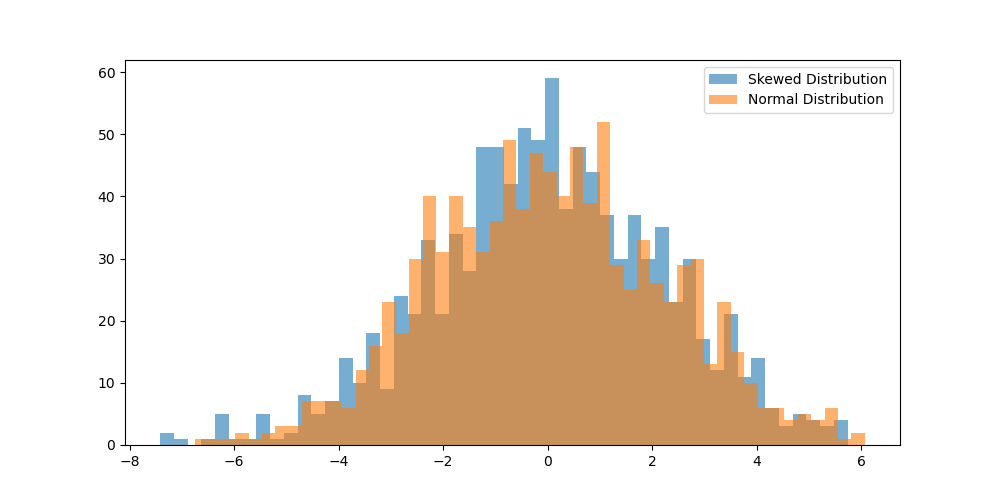

In [30]:
# Specify your desired parameters
mean = 0
var = 5
skewness = 0. 
size = 1000

# Generate the distribution
distribution = generate_distribution(mean, var, skewness, size)
distribution_norm =  norm.rvs(loc=mean, scale=np.sqrt(var), size=size)

# Plot the distribution
plt.figure(figsize=(10, 5))
plt.hist(distribution, bins=50, alpha=0.6, label='Skewed Distribution')
plt.hist(distribution_norm, bins=50, alpha=0.6, label='Normal Distribution')
plt.legend()
plt.show()


In [31]:

# distribution_norm = copy(distribution)
sdist      = sort(distribution)
sdist_norm = sort(distribution_norm)



def checking_moments(distribution):
    generated_mean = np.mean(distribution)
    generated_var = np.var(distribution)
    generated_skewness = skew(distribution)
    generated_kurtosis = kurtosis(distribution)

    return generated_mean, generated_var, generated_skewness, generated_kurtosis



checking_moments(distribution)

(-5.684341886080802e-17,
 5.000000000000002,
 -0.16883492169805045,
 0.05376547721359781)

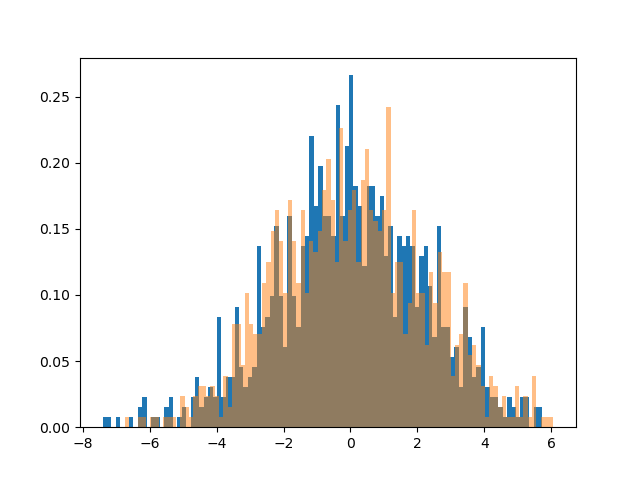

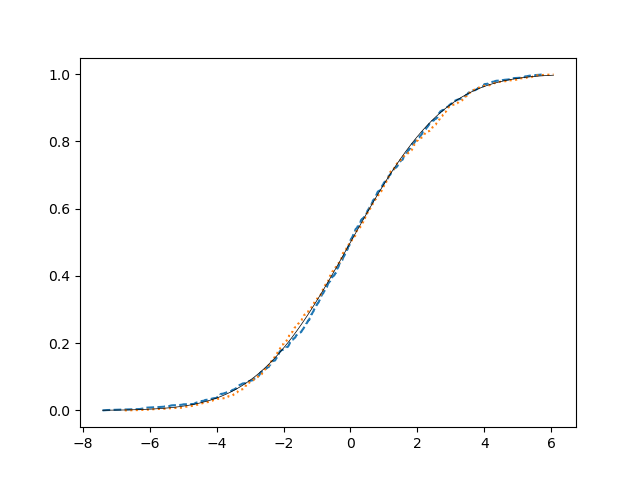

In [32]:

ifig=1;close(ifig);figure(ifig)
bins=100
a=hist(sdist,bins=bins,density=True)
a=hist(sdist_norm,alpha=0.5,bins=bins,density=True)

ifig=8;close(ifig);figure(ifig)

# # Calculate the cumulative sum of the sorted data
# cumulative = np.cumsum(ndist)
# # Normalize the cumulative sum to get the CDF
# cdf = cumulative / max(cumulative)
# plot(xi,cdf,'-')
plot(sdist,array(list(range(0,size,1)))/size,'--')
plot(sdist_norm,array(list(range(0,size,1)))/size,':')

# plot normal cdf to compare
x_values = np.linspace(min(sdist_norm[0],sdist[0]),max(sdist_norm[-1],sdist[-1]), 1000)
normal_cdf = norm.cdf(x_values,loc=mean, scale=sqrt(var))
plot(x_values,normal_cdf,'k-', lw=0.5)

The following two invocations give very different results. Why is this the case?

In [33]:
kstest(distribution,'norm')

KstestResult(statistic=0.19456520675791356, pvalue=1.2251326358069702e-33, statistic_location=1.5595359338876948, statistic_sign=-1)

In [34]:
kstest(distribution,distribution_norm)

KstestResult(statistic=0.037, pvalue=0.5005673707894058, statistic_location=-1.4403048348094207, statistic_sign=-1)

### Normalization
The **KS test** is used to compare a sample with a reference probability distribution (one-sample KS test) or to compare two samples (two-sample KS test). When comparing a sample against a reference distribution, such as the normal distribution, it's important that the sample data conforms to the scale and location (mean and standard deviation) of the reference distribution.

If your experimental data does not have a standard deviation of 1 (and mean of 0 for a standard normal distribution), you need to either:
#### Normalize the data
For example like this:
```Python
# Your experimental data
data = np.array([...])  # Replace with your data

# Normalize the data
normalized_data = (data - np.mean(data)) / np.std(data)

# Perform KS test against a standard normal distribution
ks_statistic, p_value = stats.kstest(normalized_data, 'norm')
```

In [ ]:
normalized_data = (distribution - np.mean(distribution)) / np.std(distribution)
kstest(normalized_data,'norm')

You can achieve the same using the `args` argument:
```Python
mean, std_dev = np.mean(distribution), np.std(distribution)
kstest(distribution,'norm', args=(mean, std_dev))
```

In [ ]:
mean, std_dev = np.mean(distribution), np.std(distribution)
kstest(distribution,'norm', args=(mean, std_dev))

#### Specify the CDF of a normal distribution
It has to have the same mean and standard deviation as your data. This approach uses the two-sample mode of kstest, where you provide the CDF of the desired normal distribution.
```Python
# Your experimental data
data = np.array([...])  # Replace with your data

# Create a normal distribution with the same mean and std dev as your data
norm_dist = stats.norm(loc=np.mean(data), scale=np.std(data))

# Perform KS test
ks_statistic, p_value = stats.kstest(data, norm_dist.cdf)
```

The **Anderson-Darling test** in scipy.stats automatically standardizes the data (i.e., it subtracts the mean and divides by the standard deviation of the sample) when comparing against many common distributions, including the normal distribution. 

Critical values provided are for the following significance levels (from the doc string):
```
normal/exponential
    15%, 10%, 5%, 2.5%, 1%
```

In [ ]:
# anderson?

In [ ]:
dist = distribution
print(checking_moments(dist))
anderson(dist)

In [ ]:
dist = distribution_norm
print(checking_moments(dist))
anderson(dist)

In [ ]:
anderson_ksamp([distribution,distribution_norm])